In [21]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

In [22]:
classifier = Sequential()

In [23]:
# step2 adding 1st Convolution layer and Pooling layer
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [24]:
# step3 adding 2nd convolution layer and polling layer
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [25]:
#step4 Flattening the layers
classifier.add(Flatten())

In [26]:
#step5 Full_Connection

classifier.add(Dense(units=32,activation = 'relu'))

classifier.add(Dense(units=64,activation = 'relu'))

classifier.add(Dense(units=128,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=6,activation = 'softmax'))

In [27]:
#step6 Compiling CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
#step7 Fitting CNN to images

from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255, # To rescaling the image in range of [0,1]
                                   shear_range = 0.2, # To randomly shear the images 
                                   zoom_range = 0.2, # To randomly zoom the images
                                   horizontal_flip = True) #  for randomly flipping half of the images horizontally 

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining the data...\n")
#print(os.getcwd())



Training the data...



In [16]:
training_set = train_datagen.flow_from_directory('Train',
                                                target_size=(64,64),
                                                batch_size=12, #Total no. of batches
                                                class_mode='categorical')

Found 10901 images belonging to 6 classes.


In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Train',
                                                 target_size=(64, 64),
                                                 batch_size=12,
                                                 class_mode='categorical')

Found 10901 images belonging to 6 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('Test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical')

Found 2698 images belonging to 6 classes.


In [23]:
history=classifier.fit_generator(training_set,
                         steps_per_epoch=340, # Total training images
                         epochs= 3, # Total no. of epochs
                         validation_data = test_set,
                        validation_steps= 200) # Total testing images


Epoch 1/3


C:\Users\HI\AppData\Local\Temp\ipykernel_2964\2535231903.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(training_set,


340/340 [==============================] - 37s 108ms/step - loss: 0.2809 - accuracy: 0.9052 - val_loss: 0.2682 - val_accuracy: 0.9025
Epoch 2/3
340/340 [==============================] - 37s 109ms/step - loss: 0.2456 - accuracy: 0.9157 - val_loss: 0.2483 - val_accuracy: 0.9100
Epoch 3/3
340/340 [==============================] - 37s 107ms/step - loss: 0.2361 - accuracy: 0.9178 - val_loss: 0.2214 - val_accuracy: 0.9225


In [35]:
#step8 saving model 

classifier.save('model')


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [14]:
model_version=1
model.save(f"../models/{model_version})

SyntaxError: unterminated string literal (detected at line 2) (2814451326.py, line 2)

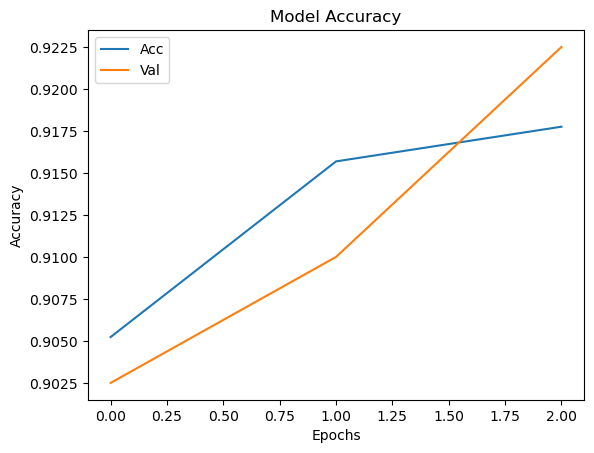

In [24]:
import matplotlib.pyplot as plt
#Evaluation

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

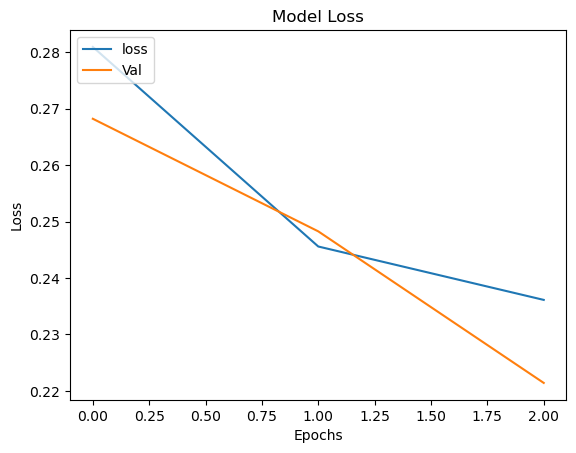

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [27]:
pip install Keras-Preprocessing

     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install imagepreprocessing

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imagepreprocessing: filename=imagepreprocessing-1.7.2-py3-none-any.whl size=23070 sha256=0a19481bfca260563c27bcaa1baacf2f23b4da2ce48963b2911fe0dcb18eb8c2
  Stored in directory: c:\users\hi\appdata\local\pip\cache\wheels\0f\f8\c1\89f23a0f0832d1d2308a52e5c779530eb19d4c7fb6a5e61e18
Successfully built imagepreprocessing
Note: you may need to restart the kernel to use updated packages.


In [31]:
import keras; 
print(keras.__version__)

2.12.0


In [32]:
!pip install --upgrade keras

In [33]:
import tensorflow as tf;
print(tf.__version__)

2.12.0


In [34]:
!pip install --upgrade tensorflow

In [8]:
import keras
import tensorflow as tf
import keras.preprocessing.image
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array

image_array = img_to_array(predict_it)


In [11]:
image_reshaped = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input


In [8]:
predict_it = load_img('fruit4.jpg', target_size=(224, 224))
image_array = img_to_array(predict_it)


In [9]:
def predict(model, img):
    global img_array
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [11]:
#img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))


In [13]:
from keras.applications.imagenet_utils import preprocess_input
import tensorflow as tf 
from tensorflow import keras

preprocessed_image = preprocess_input(image_array)
MODEL= tf.keras.models.load_model("C:\Users\HI\model.h5")
# predict the probability across all output classes
new = MODEL.predict(image)

print (new)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3089263507.py, line 6)

In [13]:
predict_it = load_img('fruit4.jpg', target_size=(224,224))

#from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
#image = tf.keras.utils.array_to_img(predict_it)
#image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

print (yhat)

TypeError: 'Image' object is not subscriptable